## World Happiness Report Project

Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was
published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The 
World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United 
Nations at an event celebrating International Day of Happiness on March 20th. The report continues to 
gain global recognition as governments, organizations and civil society increasingly use happiness 
indicators to inform their policy-making decisions. Leading experts across fields – economics, 
psychology, survey analysis, national statistics, health, public policy and more – describe how 
measurements of well-being can be used effectively to assess the progress of nations. The reports 
review the state of happiness in the world today and show how the new science of happiness explains 
personal and national variations in happiness.


What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing 
Dystopia is to have a benchmark against which all countries can be favorably compared (no country 
performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each 
sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, 
characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest 
incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social 
support, it is referred to as “Dystopia,” in contrast to Utopia.


What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the 
six variables either over- or under-explain average life evaluations. These residuals have an average 
value of approximately zero over the whole set of countries. 


What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government 
Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or 
the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


Dataset Link

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score

C:\Users\Sank\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
happiness_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
happiness_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Observation:
            1. Label (Happiness Score) is a continous data so this is a Regression problem.

## Exploratory Data Analysis

In [14]:
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
happiness_df.shape

(158, 12)

In [16]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [17]:
happiness_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Observation:
            1. None of the 12 columns have any NaN values

In [18]:
happiness_df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [19]:
happiness_df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

Observation:
            1. From this we can see that 'Happiness Score' is the label column 
            2. The rest of the columns are the features 'Country', 'Region', 'Happiness Rank',
            'Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 
            'Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual'

## Drop Column not needed

In [20]:
# 'Country', 'Region' and 'Happiness Rank' column not needed for prediction of 'Happines Score'

happiness_df.drop(["Country", 'Region', 'Happiness Rank'], axis = 1, inplace = True)
happiness_df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [21]:
happiness_df.shape   # 9 columns

(158, 9)

## check for any blank records

In [22]:
# check for any blank records

happiness_df.loc[happiness_df['Dystopia Residual'] == ' '] 

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


Observation:
            1. checked all 9 columns but none have any blank values

In [23]:
happiness_df.shape

(158, 9)

## check the duplicate values in rows

In [24]:
happiness_df.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [25]:
happiness_df.columns.tolist()

['Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [26]:
happiness_df.shape

(158, 9)

In [27]:
happiness_df.duplicated().sum()

0

Observation:
            1. No duplicate values in rows.

In [28]:
happiness_df.shape

(158, 9)

## Number of uniques values in each column 

In [29]:
happiness_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158
Dystopia Residual,158


In [30]:
happiness_df.sample(n = 5)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
90,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
148,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
66,5.689,0.05580,1.20813,0.89318,0.92356,0.40672,0.06146,0.30638,1.88931
111,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
10,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854


In [31]:
happiness_df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:
            1. No missing values
            2. Mean value and median value are almost same.
            3. Looks like there some outliers exist.

In [32]:
happiness_df.shape

(158, 9)

## Data Visualization

In [35]:
# seperating numerical and categorical columns

cat_col = []
for i in happiness_df.dtypes.index:
    if happiness_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in happiness_df.dtypes.index:
    if happiness_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column []


Numerical Column ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


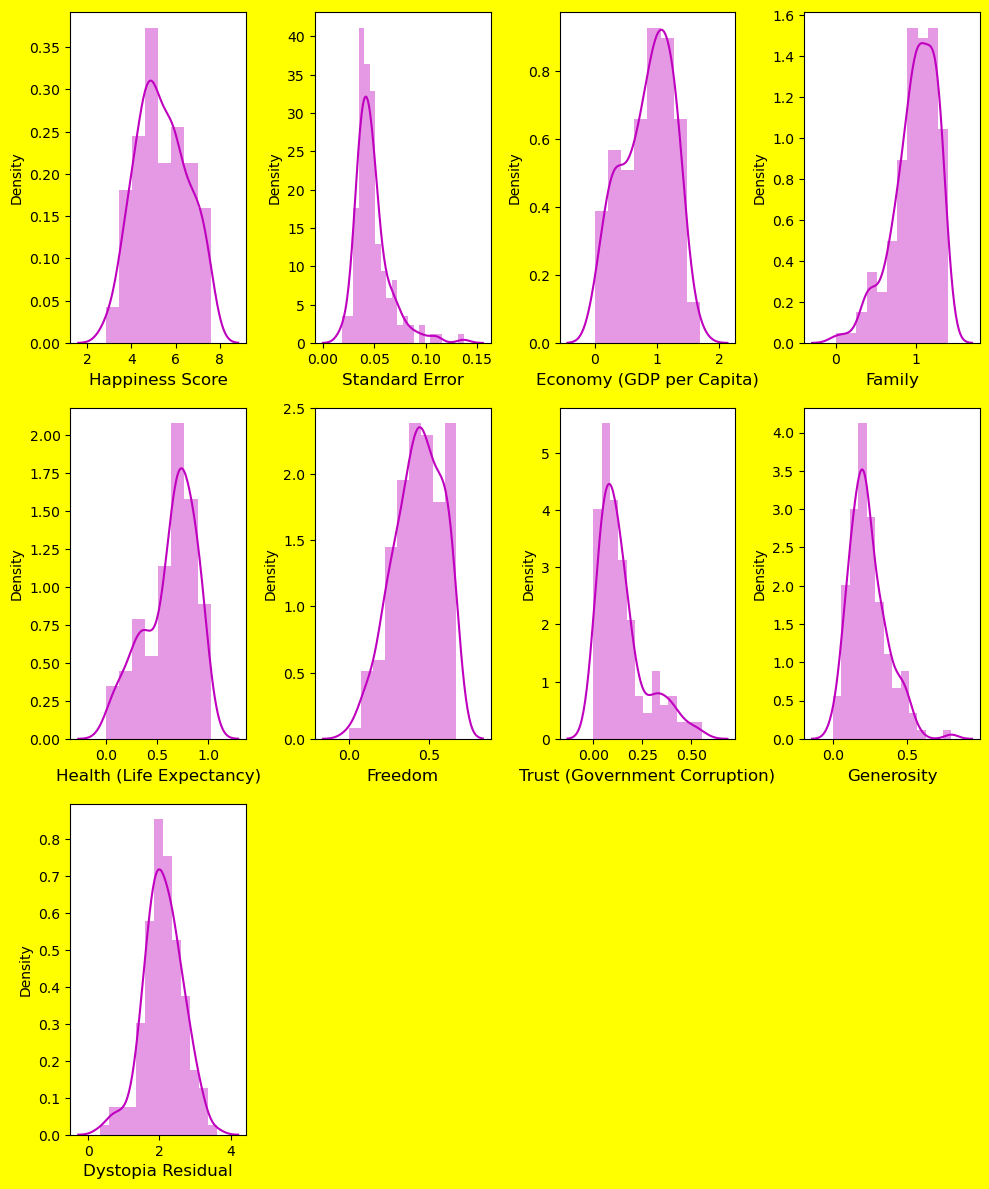

In [40]:
# lets see how data is distributed for every column

plt.figure(figsize = (10,12), facecolor = 'yellow')
p = 1
for i in num_col:
    if p <= 9:
        ax = plt.subplot(3, 4, p)
        sns.distplot(happiness_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
        1. There are outliers - Looks like we should also deal with outliers
        2. We need to deal with skewness in the data - most of the columns right skewness are there 

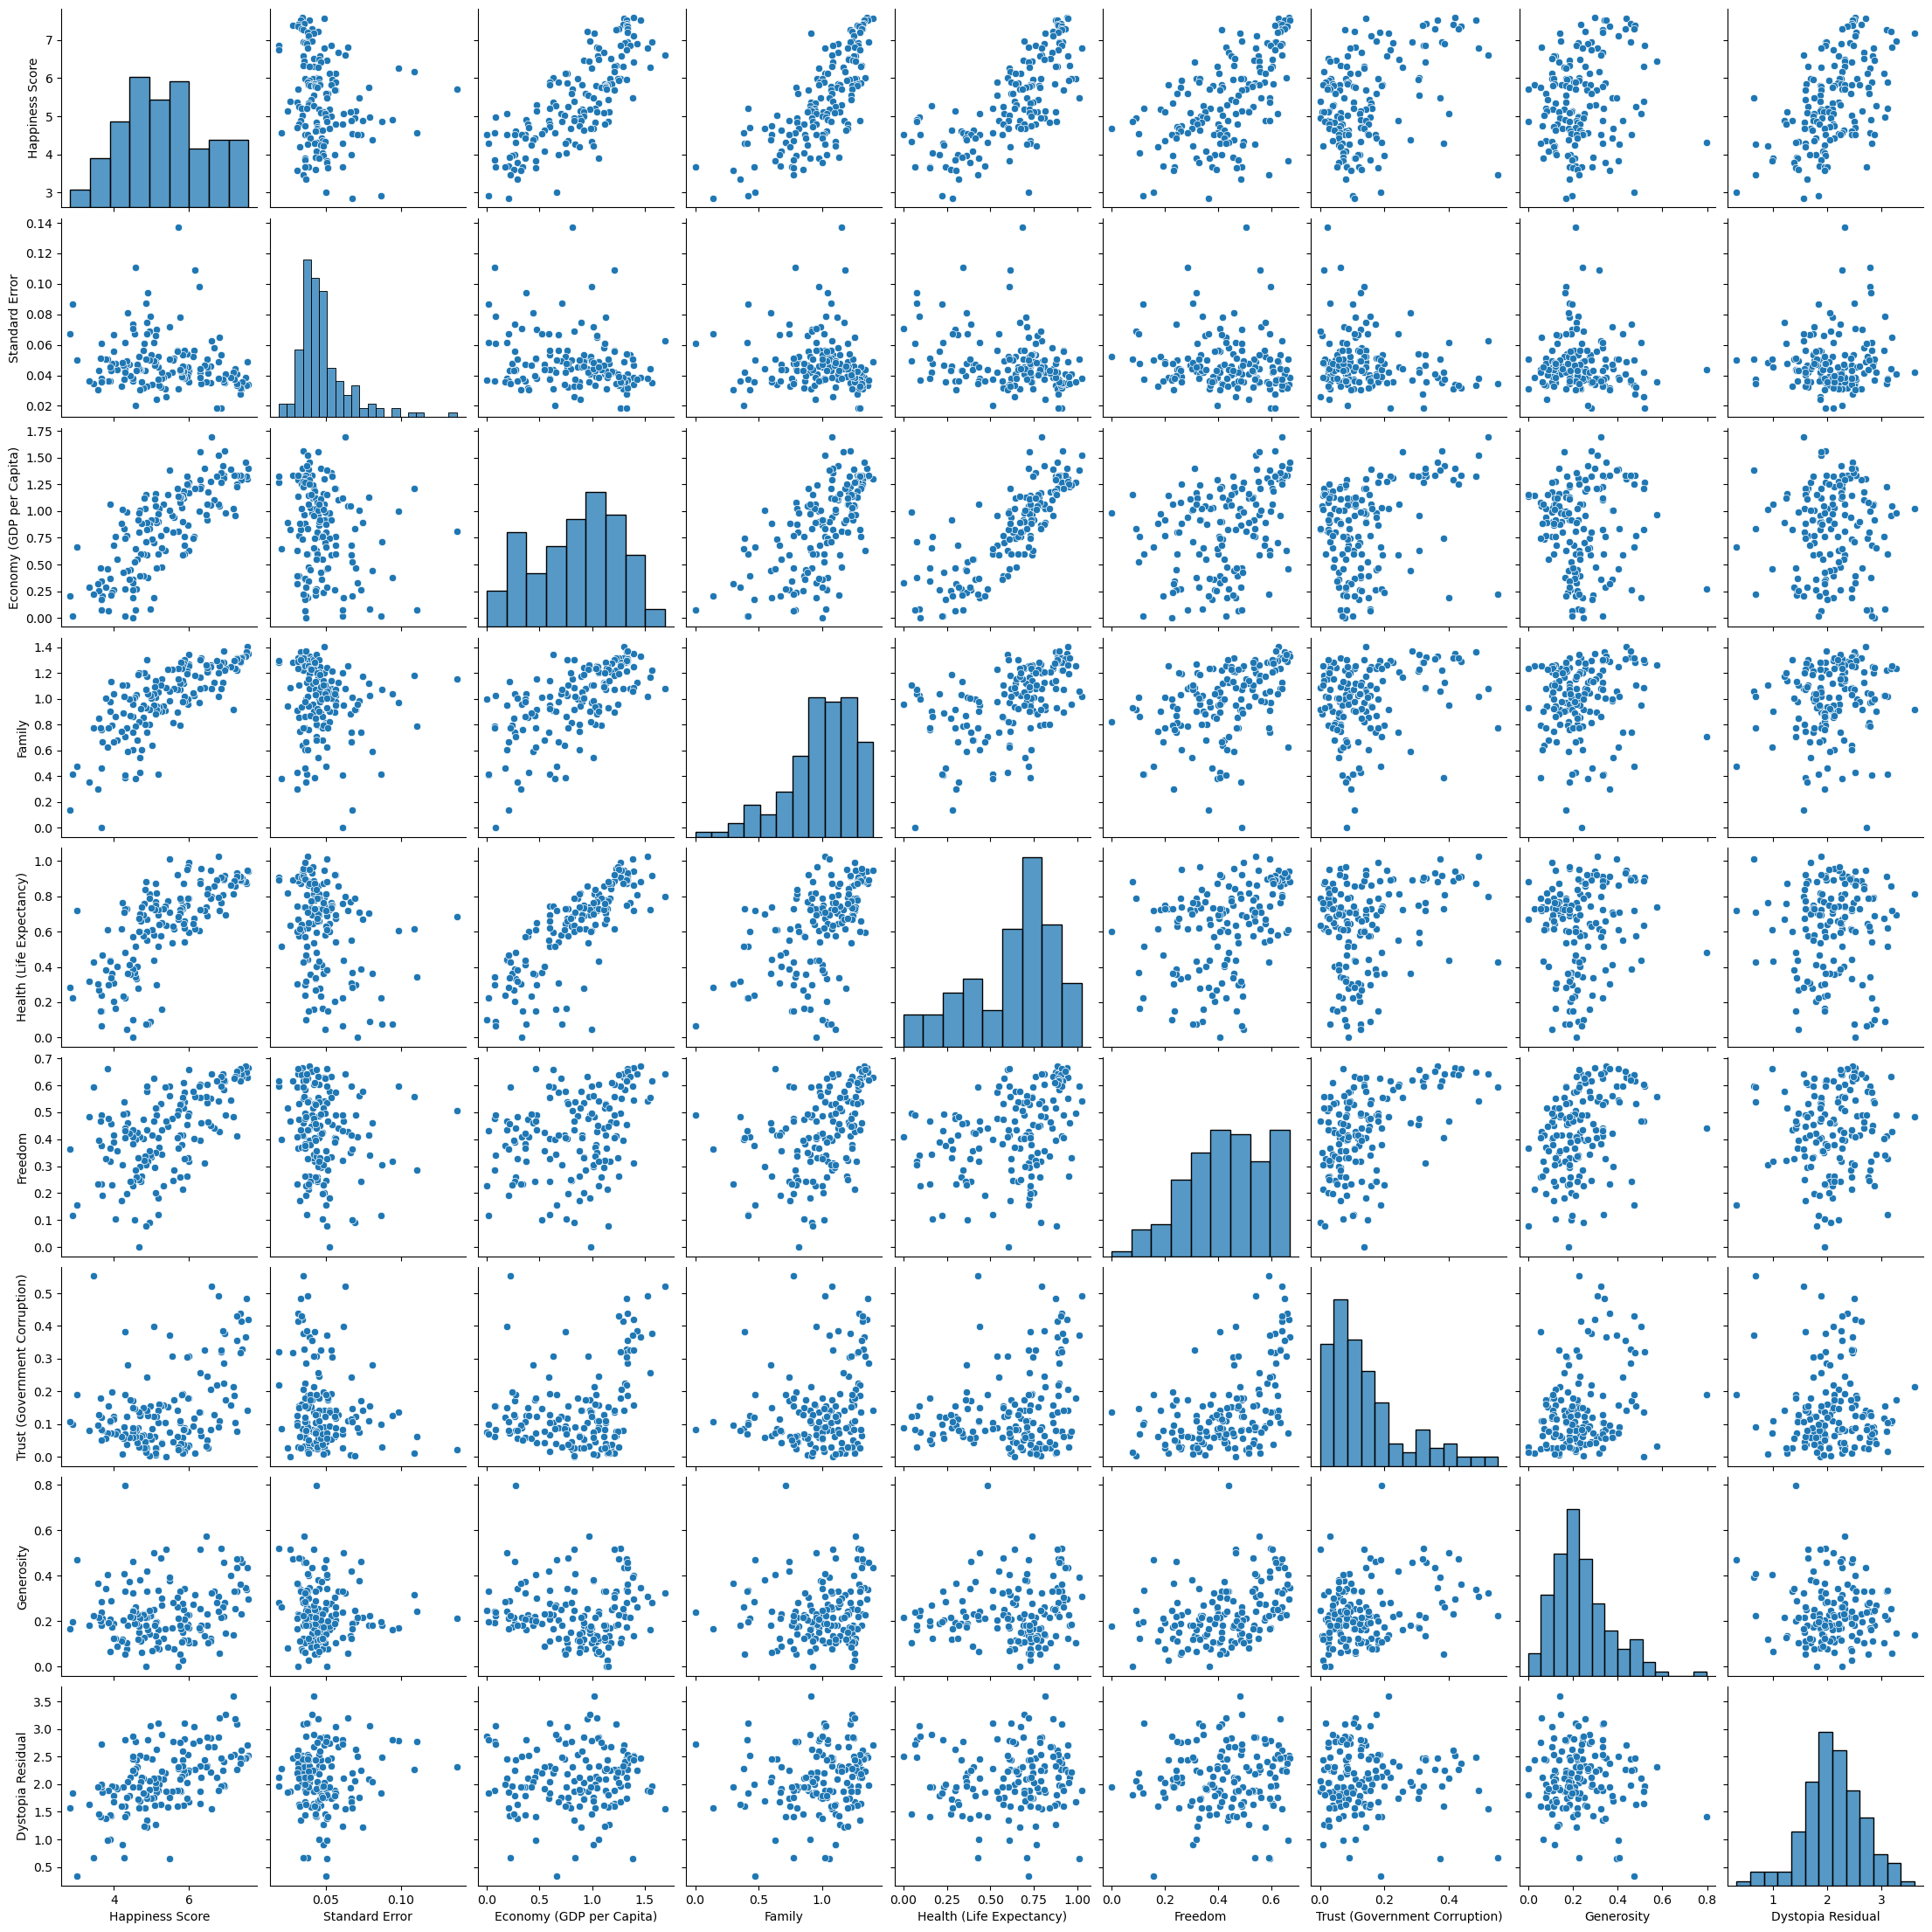

In [44]:
sns.pairplot(palette = 'Dark2', data = happiness_df)

## Check for Multicollinearity

## Data Correlation find - whether we need all 9 columns

In [41]:
happiness_df.shape

(158, 9)

In [45]:
# get coefficient of one variable with all the other variables

cor = happiness_df.corr()
cor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


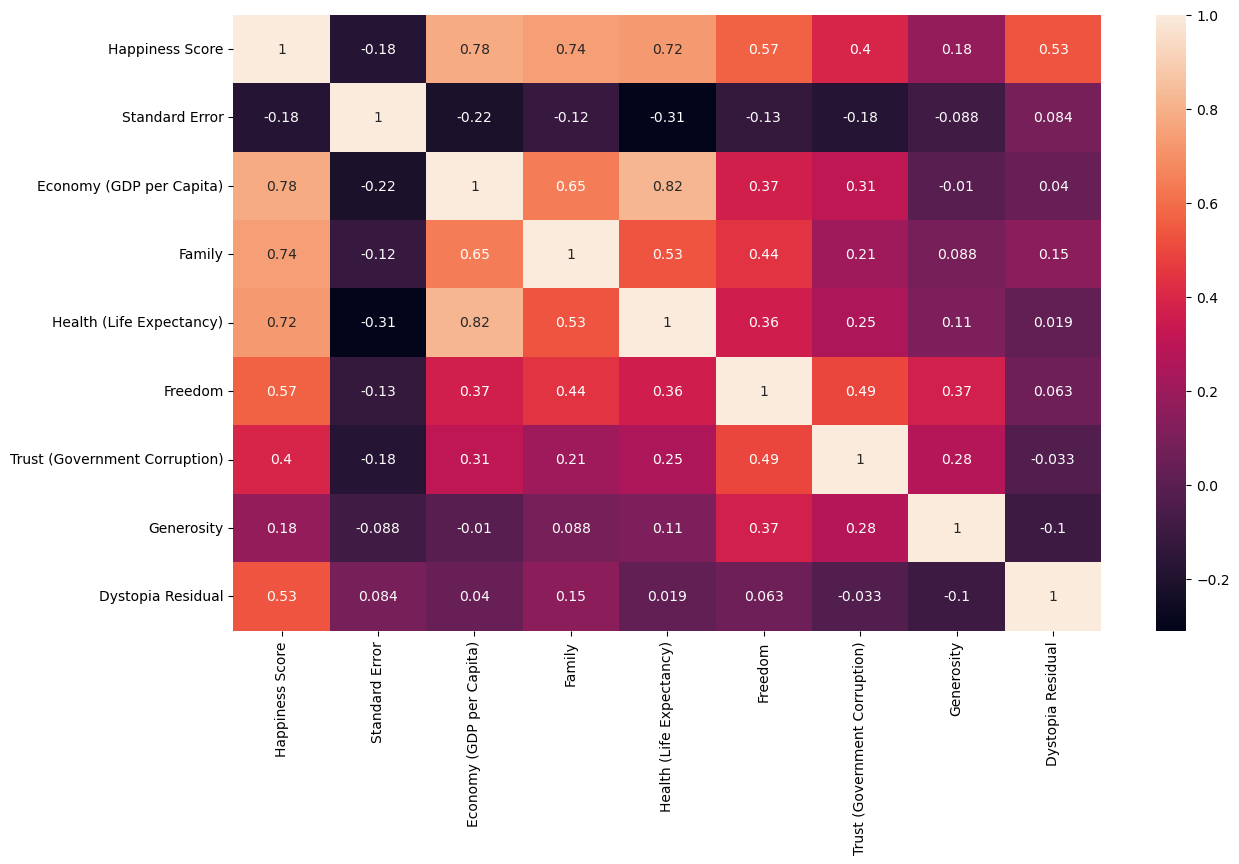

In [46]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'Economy (GDP per Capita)' v/s 'Health (Life Expectancy)' has
               more positive correlation 0.82
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

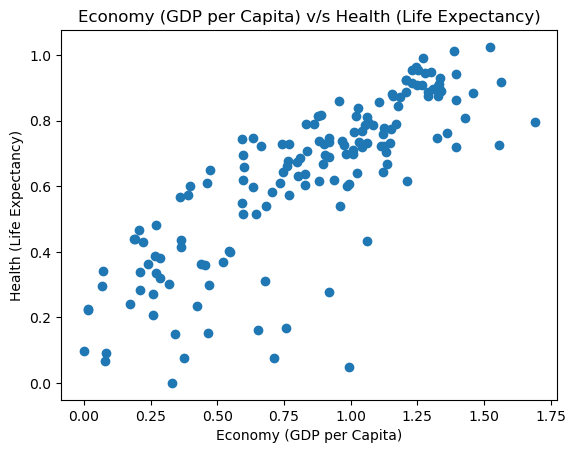

In [50]:
# one more proof so will plot scatter plot and check

plt.scatter(happiness_df['Economy (GDP per Capita)'], happiness_df['Health (Life Expectancy)'])
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Health (Life Expectancy)")
plt.title("Economy (GDP per Capita) v/s Health (Life Expectancy)")
plt.show()

Observation:
            1. feature v/s feature - 'Economy (GDP per Capita)' v/s 'Health (Life Expectancy)' 
               from this scatter plot, we got to know that there is multicollinearity issue between 
               these two features - as 'Economy (GDP per Capita)' increases 'Health (Life Expectancy)'
                value increases - positive correlation

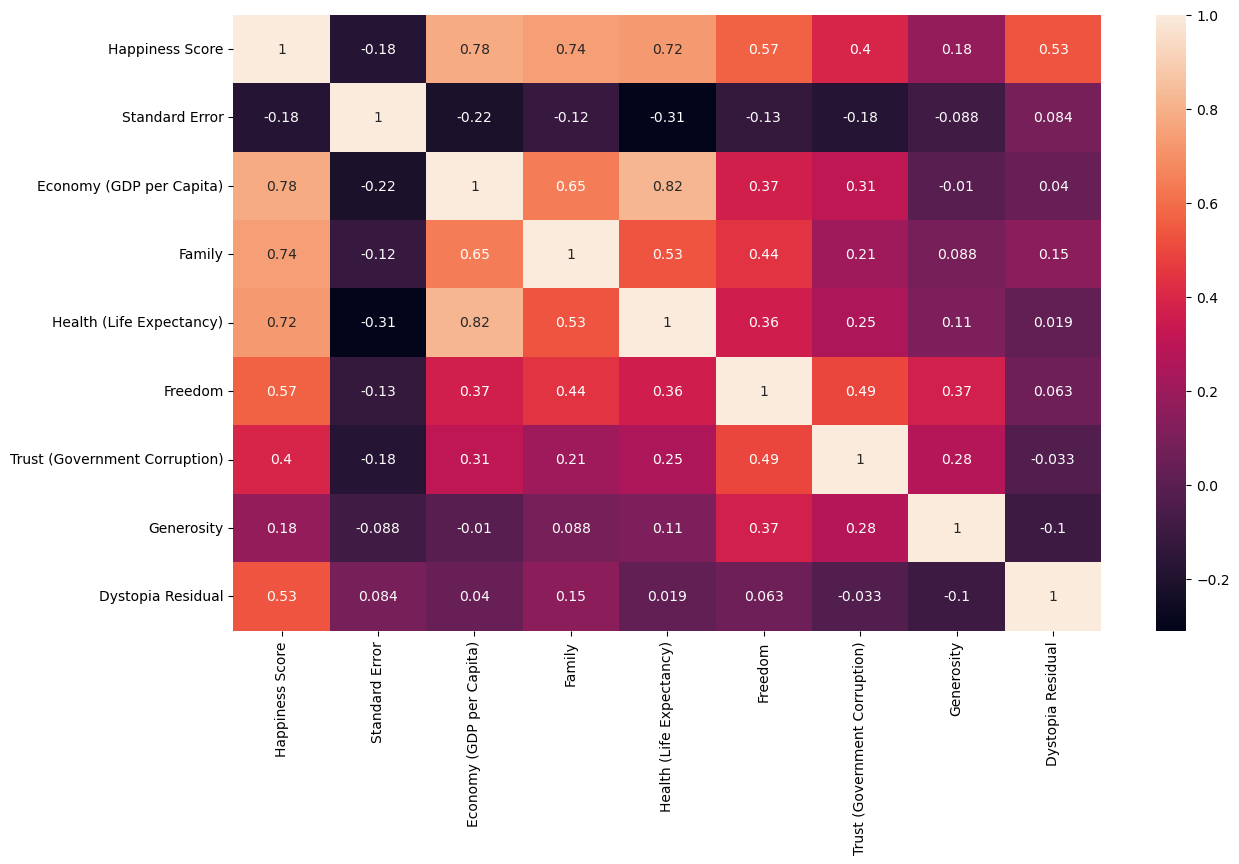

In [51]:
# Now check through heat map 'Economy (GDP per Capita)' or 'Health (Life Expectancy)' is contributing 
# more correlation to the label keep that and drop the other one

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'Economy (GDP per Capita)' v/s 'Happiness Score' is 0.78 and 
               'Health (Life Expectancy)' v/s 'Happiness Score' is 0.72 from this heatmap we get to 
               know 'Economy (GDP per Capita)' is contributing more to 'Happiness Score' than 'Health
               (Life Expectancy)'. so we can remove 'Health (Life Expectancy)' feature.
                
            2. feature v/s feature - 'Economy (GDP per Capita)' v/s 'Family' 
               has positive correlation 0.65. This shows there might be multicollinearity issue 
               but we need one more proof so will plot scatter plot and check

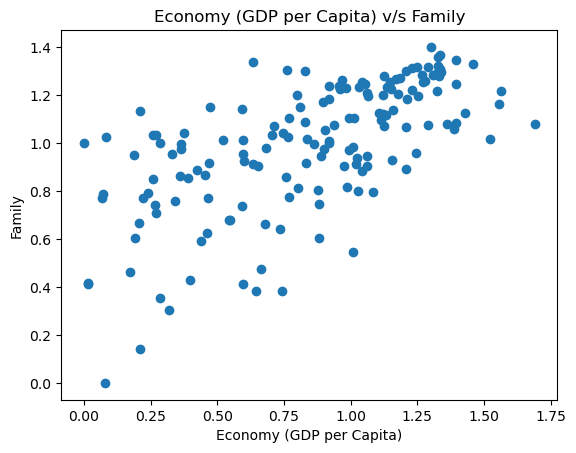

In [52]:
# one more proof so will plot scatter plot and check

plt.scatter(happiness_df['Economy (GDP per Capita)'], happiness_df.Family)
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Family")
plt.title("Economy (GDP per Capita) v/s Family")
plt.show()

Observation:
            1. feature v/s feature - 'Economy (GDP per Capita)' v/s 'Family' 
               from this scatter plot, we got to know that there is multicollinearity issue between 
               these two features - as 'Economy (GDP per Capita)' increases 'Family'
                value increases - positive correlation

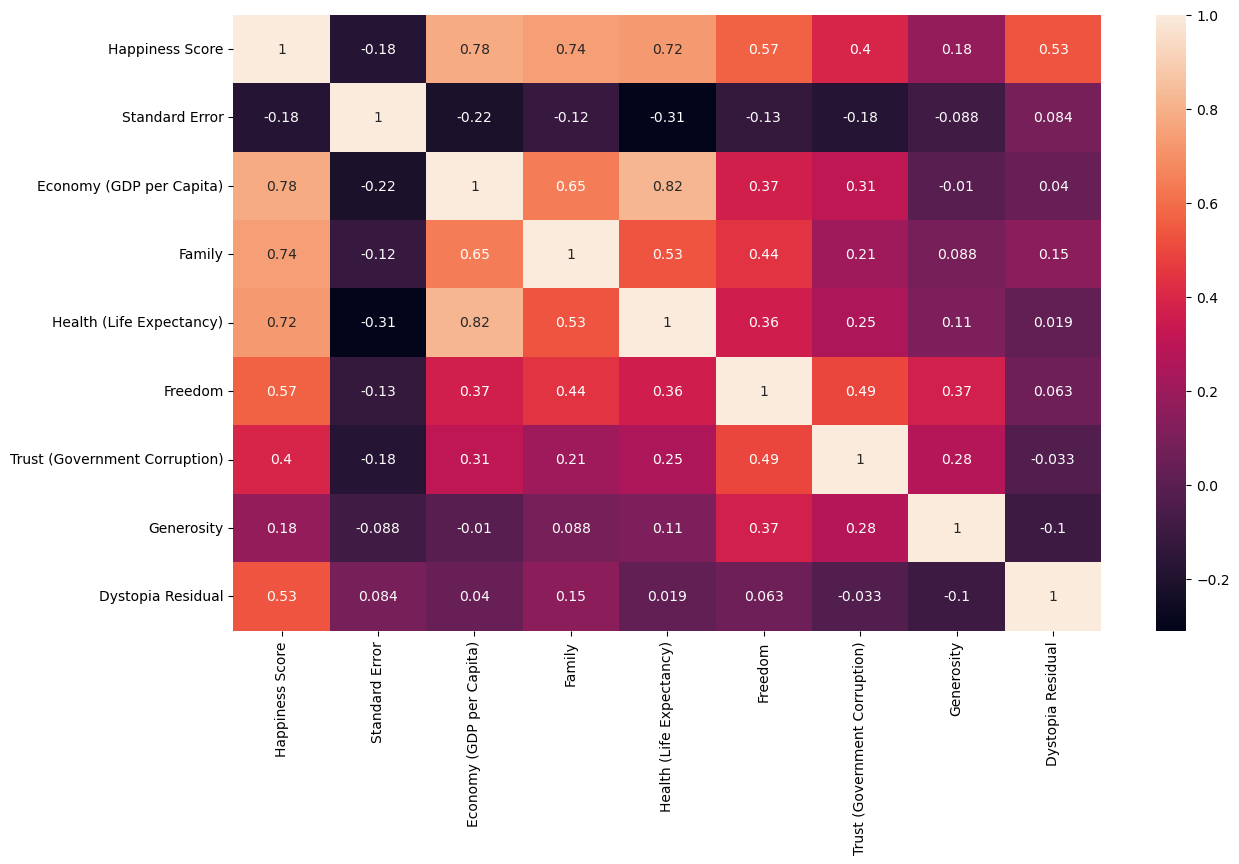

In [53]:
# Now check through heat map 'Economy (GDP per Capita)' or 'Family' is contributing 
# more correlation to the label keep that and drop the other one

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'Economy (GDP per Capita)' v/s 'Happiness Score' is 0.78 and 
               'Family' v/s 'Happiness Score' is 0.74 from this heatmap we get to 
               know 'Economy (GDP per Capita)' is contributing more to 'Happiness Score' than 
               'Family'. so we can remove 'Family' feature.

In [55]:
# correlation of all features with the target column - 'Happiness Score'

cor['Happiness Score'].sort_values(ascending = False)   

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

In [56]:
happiness_df.drop(columns = ['Health (Life Expectancy)', 'Family'], axis = 1, inplace = True)
happiness_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.11850,0.10062,0.19727,1.83302


In [58]:
happiness_df.shape

(158, 7)

## Seperating Features and Target

In [59]:
x = happiness_df.drop(columns = ['Happiness Score'])
y = happiness_df['Happiness Score']

In [60]:
x

,Standard Error,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...
153,0.03464,0.22208,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.11850,0.10062,0.19727,1.83302


In [61]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [62]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-8.05925692e-01,  1.36962124e+00,  1.57743784e+00,
         2.30965159e+00,  4.71039706e-01,  7.58258088e-01],
       [ 5.58894532e-02,  1.13522625e+00,  1.33245589e+00,
        -1.64795307e-02,  1.57585637e+00,  1.09285682e+00],
       [-8.54486899e-01,  1.19286069e+00,  1.46965910e+00,
         2.84277380e+00,  8.24292797e-01,  7.12335259e-01],
       [-5.31525622e-01,  1.52512972e+00,  1.60513145e+00,
         1.85208080e+00,  8.68637502e-01,  6.63893379e-01],
       [-7.22845074e-01,  1.19487640e+00,  1.36041579e+00,
         1.55572536e+00,  1.74856316e+00,  6.39337171e-01],
       [-9.64480957e-01,  1.10518965e+00,  1.41846586e+00,
         2.25900540e+00, -2.99762791e-02,  9.43417340e-01],
       [-1.16399146e+00,  1.20271529e+00,  1.24584679e+00,
         1.46019962e+00,  1.89102052e+00,  6.64600163e-01],
       [-9.54534685e-01,  1.20836426e+00,  1.53902627e+00,
         2.46560175e+00,  9.92406743e-01,  4.93322871e-01],
       [-8.29328683e-01,  1.00547410e+00,  1.403

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.076844,Standard Error
1,1.273844,Economy (GDP per Capita)
2,1.610751,Freedom
3,1.400122,Trust (Government Corruption)
4,1.246417,Generosity
5,1.033412,Dystopia Residual


Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe all features are within the threshold value=5. 
               so there is no multicollinearity problem. 

## Checking Outliers

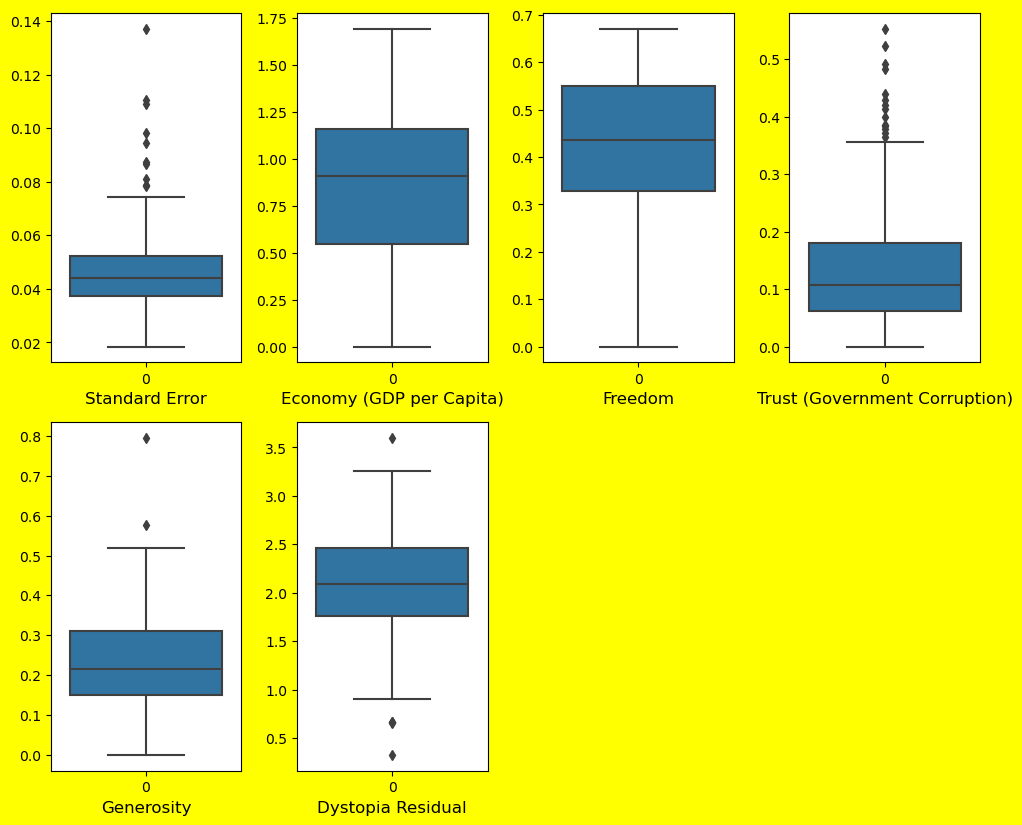

In [64]:
# Visualize the outliers using boxplot

plt.figure(figsize = (10,12), facecolor = 'yellow')
p = 1
for i in x:
    if p <= 9:
        ax = plt.subplot(3, 4, p)
        sns.boxplot(data = x[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in features - 'Standard Error', 'Trust (Government Corruption)' 
            and 'Generosity'. The outliers are right skewed (i.e. outliers are above max value)
            2. Remove the outliers

In [66]:
happiness_df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [67]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = happiness_df.quantile(0.25)
q3 = happiness_df.quantile(0.75)
iqr = q3 - q1

In [69]:
# validating one outlier

Standard_Error_high = (q3['Standard Error'] + (1.5 * iqr['Standard Error']))
Standard_Error_high

# anything > 0.074 outliers

0.07484874999999999

In [72]:
# check the index which have the higher values

np_index = np.where(happiness_df['Standard Error'] > Standard_Error_high)
np_index

# remove these indexes as they are outliers

(array([ 39,  40,  62,  64,  93,  96, 100, 115, 125, 156], dtype=int64),)

In [73]:
happiness_df.shape

(158, 7)

In [74]:
happiness_df = happiness_df.drop(happiness_df.index[np_index])

In [75]:
happiness_df.shape  # 10 rows removed - outliers

(148, 7)

In [76]:
happiness_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
152,3.575,0.03084,0.31982,0.23414,0.09719,0.36510,1.95210
153,3.465,0.03464,0.22208,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.15684,0.18906,0.47179,0.32858


In [77]:
happiness_df.reset_index(inplace = True, drop = True)

In [78]:
happiness_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
143,3.575,0.03084,0.31982,0.23414,0.09719,0.36510,1.95210
144,3.465,0.03464,0.22208,0.59201,0.55191,0.22628,0.67042
145,3.340,0.03656,0.28665,0.48450,0.08010,0.18260,1.63328
146,3.006,0.05015,0.66320,0.15684,0.18906,0.47179,0.32858


Observation:
            1. As there are less rows so removing outliers we may loss lot of data, so we removed
                outliers only in 'Standard Error' feature and remaining columns outliers will keep it 

## Checking for Skewness

In [79]:
happiness_df.skew() # not in the range -0.5 to +0.5

Happiness Score                  0.113989
Standard Error                   0.552059
Economy (GDP per Capita)        -0.319796
Freedom                         -0.430981
Trust (Government Corruption)    1.357546
Generosity                       0.942450
Dystopia Residual               -0.200286
dtype: float64

In [81]:
# removing for skewness

happiness_df['Trust (Government Corruption)'] = np.cbrt(happiness_df['Trust (Government Corruption)'])

happiness_df['Generosity'] = np.cbrt(happiness_df['Generosity'])

In [82]:
happiness_df.skew() 

Happiness Score                  0.113989
Standard Error                   0.552059
Economy (GDP per Capita)        -0.319796
Freedom                         -0.430981
Trust (Government Corruption)    0.003527
Generosity                      -0.953095
Dystopia Residual               -0.200286
dtype: float64

Observation:
            1. 'Generosity' litte less than -0.5
            2. Almost all other features - there is no skewness

## Modelling

In [84]:
happiness_df.shape

(148, 7)

In [137]:
happiness_df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [138]:
x = happiness_df.drop(columns = ['Happiness Score'])
y = happiness_df['Happiness Score']

In [139]:
x.shape

(148, 6)

In [140]:
y.shape

(148,)

In [141]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 41)

In [142]:
model_LR = LinearRegression()

In [143]:
model_LR.fit(x_train , y_train)

LinearRegression()

## Lets check how well model fits on train data

In [144]:
model_LR.score(x_train, y_train)

0.958888271827368

## Lets check how well model fits on test data

In [145]:
model_LR.score(x_test, y_test)

0.9263611528211724

Observation:
            1. Training score - 0.9588
            2. Testing Score - 0.9263

In [146]:
y_pred = model_LR.predict(x_test)
y_pred

array([6.49717206, 6.77134583, 6.51235306, 6.91336588, 5.58272053,
       4.50862973, 4.33944314, 6.11811472, 4.18305994, 5.68513378,
       4.41372245, 4.61244349, 3.4534021 , 5.00582061, 4.46623418,
       5.0069528 , 3.96832   , 5.36869542, 5.95531683, 4.00455715,
       3.02138863, 5.55406466, 7.34133542, 5.87186979, 5.33992429,
       4.96159169, 4.95287672, 5.86965892, 5.86239884, 4.20875289,
       5.42580553, 3.14676081, 4.06591563, 7.27196646, 5.09899797,
       5.69360452, 5.34789348])

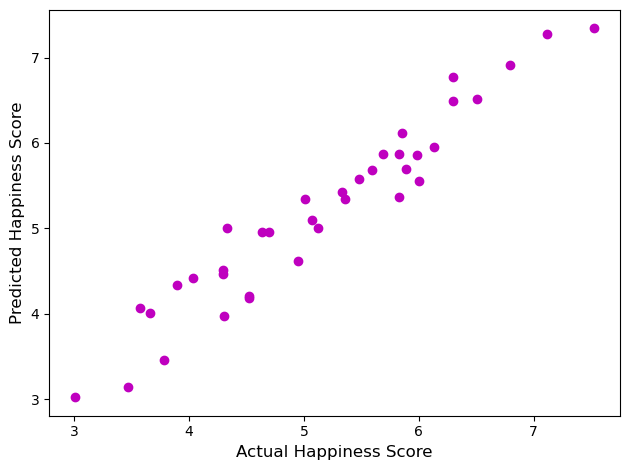

In [169]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Happiness Score", fontsize = 12)
plt.ylabel('Predicted Happiness Score', fontsize = 12)
    
plt.tight_layout()

Observation:
            1. We are able to see almost all samples are following linear curve

## Model Evaluation

In [148]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [149]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  92.63611528211723
MAE  0.24636610641934534
MSE  0.08508543827051697
RMSE  0.2916940833656332


## Regularization

## To check whether Linear Regression Model is overfitting or not - so use Regularization

In [150]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [151]:
lassocv = LassoCV(alphas = None, max_iter = 10)

In [152]:
lassocv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [153]:
# learning rate - model has learned at this rate

alpha = lassocv.alpha_
alpha

0.0006783947045386289

## Lasso Regularization Model

In [154]:
lasso_model = Lasso(alpha)

In [155]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.0006783947045386289)

In [158]:
lasso_model.score(x_test, y_test)

0.9269605233433205

In [159]:
# Linear Regression Model

model_LR.score(x_test, y_test)

0.9263611528211724

In [ ]:
Observation:
            1. Linear Regression Model was not overfitting - 
                 as Linear Regression Model and Lasso model gave same result 0.926
            2. If at all overfits avoid it

## Ridge Regularization

In [160]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))

In [161]:
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [162]:
# learning rate - model has learned at this rate , it is telling to use 0.09 value

ridgecv.alpha_

0.011

In [163]:
ridge_model = Ridge(alpha = ridgecv.alpha_)

In [164]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.011)

In [165]:
ridge_model.score(x_test, y_test)

0.9273885531760575

In [166]:
# Linear Regression Model

model_LR.score(x_test, y_test)

0.9263611528211724

In [ ]:
Observation:
            1. Linear Regression Model was not overfitting - 
                 as Linear Regression Model, Lasso model and Ridge model gave same result 0.926
            2. Therefore no overfitting

## Saving the model

In [167]:
# use Ridge Regularization Model to save the model 

import pickle
filename = "World_Happiness_Score_Model.pkl"
pickle.dump(ridge_model, open(filename, 'wb'))

## Predict the saved model

In [168]:
# lets load the saved model and get the prediction

loaded_model = pickle.load(open('World_Happiness_Score_Model.pkl', 'rb'))

result = loaded_model.score(x_test, y_test)
print(result)

0.9273885531760575


In [ ]:
Observation:
            1. Most of the actual and predicted values match
            2. This World_Happiness_Score_Model.pkl can be used to predict the Happiness Score of 
               the World Happiness Report.